Para este proyecto contamos con un dataset que cuenta con informacion sobre parcelas de produccion de manzanas, donde cada A_id corresponde a una muestra de ese lote en especifico seleccionado de manera aleatoria.


El objetivo de la utilizacion de este dataset es la prediccion de la calidad de los lotes de de fruta a travez de las cualidades de la manzana, las mismas son: size, weight, sweetness, crunchiness, juiciness, ripeness y acidity. Con la convinacion de estas variables queremos lograr la predicion de la calidad del lote, en Bueno o Malo.

Estamos realizando este proyecto para una empresa que se dedica la comercializacion y exportacion de fruta, con la esta clasificacion de las manzanas, la empresa podra saber que lote destinar la venta para su consumo directo (clasificacion buena) y que lote va a ser vendido a las empresas productoras de sidra de manzana y derivados (clasificacion mala). De esta forma va a lograr aumentar la calidad de los productos vendidos al mercado de consumo directo, pudiendo mejorar el precio del producto y mejorar las ganancias de la empresa.

Importamos las bibliotecas necesarias para el proyecto

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

Importamos DataSet

In [28]:
url = 'https://raw.githubusercontent.com/Ignaciomaalvarez/DATASCIENSE/main/apple_quality.csv'
df =pd.read_csv(url, sep=",")
df.sample(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
1720,1720,1.800420,-2.447156,-0.999295,0.929979,0.355335,-0.050020,0.812996,good
791,791,-2.477606,-0.657953,-2.094641,1.580006,-0.911673,-0.419339,-2.949444,bad
2509,2509,2.018031,0.397060,-2.599519,0.869264,0.053679,0.243394,-0.193501,bad
320,320,-0.686680,-3.020882,-0.399128,2.902398,2.594570,-3.422907,0.468330,good
3860,3860,-1.374118,-0.800035,-0.195442,-0.521671,4.076586,-1.973284,4.348132,bad


In [29]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


Aplicamos one Hot enconding para transformar las categoricas en numericas y eliminamos la columna "Quality" de la tabla, para contar solo con variables numericas


In [30]:
dfOneHotEncoding = pd.get_dummies(df['Quality'])
df = pd.concat([df, dfOneHotEncoding],axis=1)


In [31]:
df = df.drop(['Quality'], axis=1)

Realizamos Boxplot para verificar como se componen nuestros datos

<Axes: >

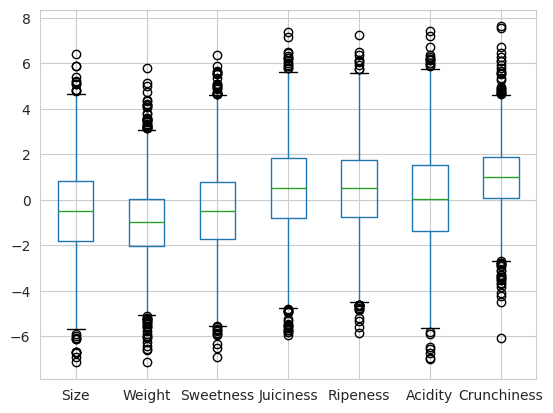

In [32]:

df.boxplot(column=["Size","Weight","Sweetness","Juiciness","Ripeness","Acidity","Crunchiness"])

Realizamos Histogramas

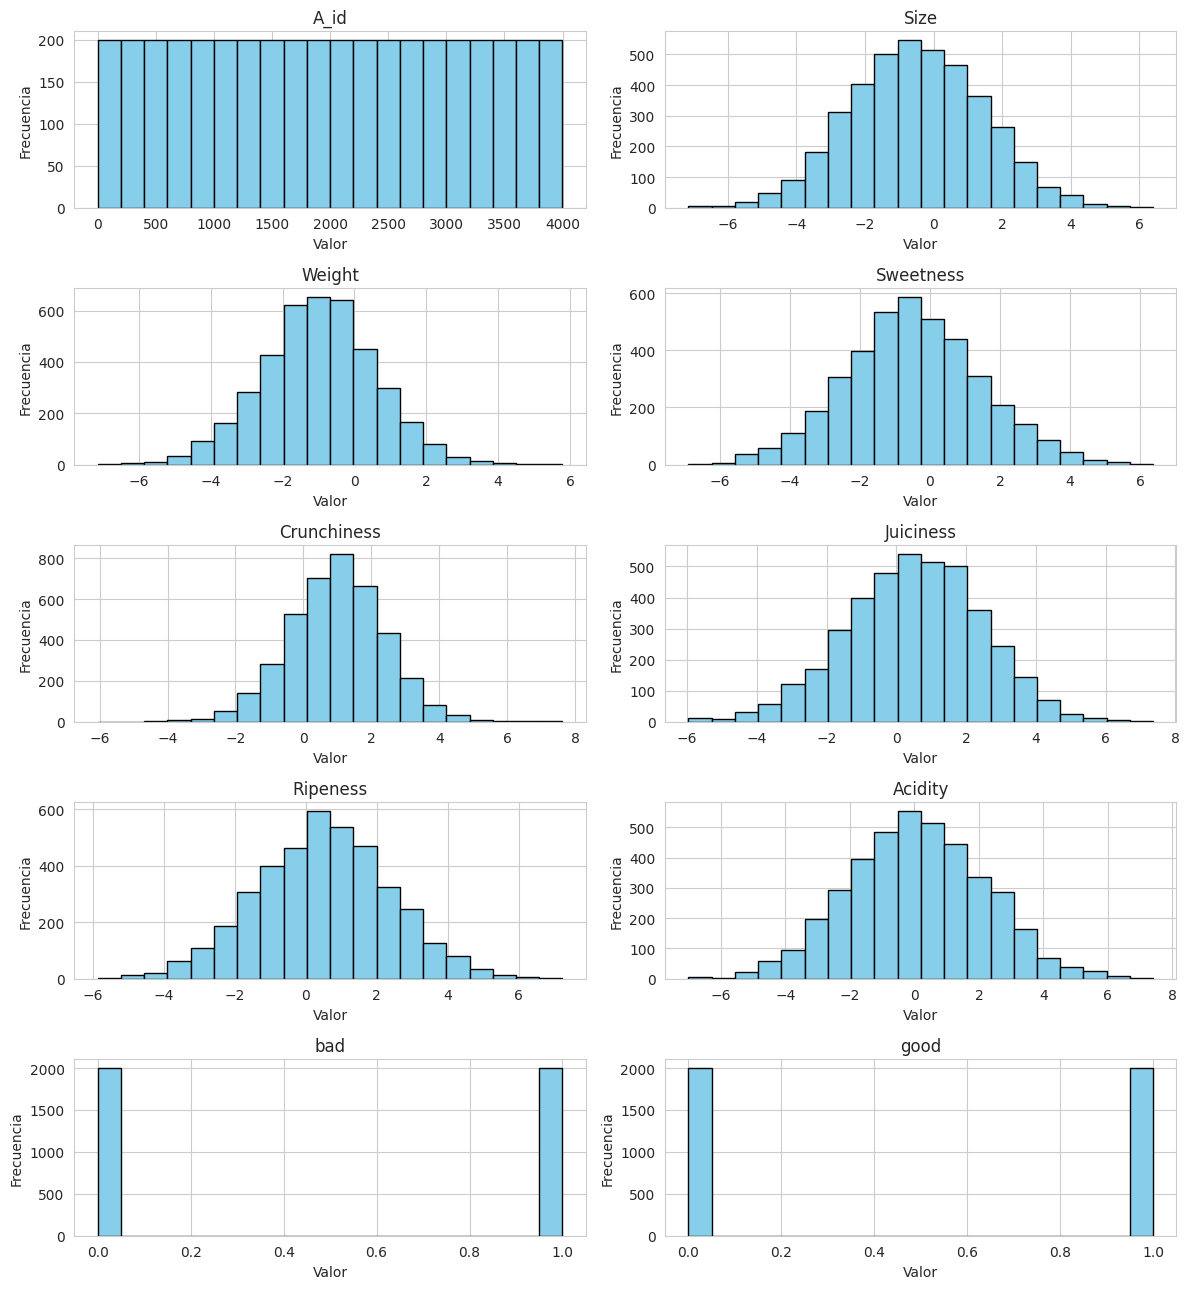

In [33]:
plt.figure(figsize=(12, 13))

for i, col in enumerate(df.columns):

    plt.subplot(5, 2, i+1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()

plt.show()

Aplicamos IQR para eleminar outliers de nuestros datos

In [34]:
datos=df
for col in datos.columns:
    # Calcula el primer y tercer cuartil
    Q1 = datos[col].quantile(0.25)
    Q3 = datos[col].quantile(0.75)

    # Calcula el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Define los límites superior e inferior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Elimina los valores fuera del rango
    datos = datos[(datos[col] >= lower_bound) & (datos[col] <= upper_bound)]

Vemos nuevamente como quedaron los datos luego de realizar IQR

<Axes: >

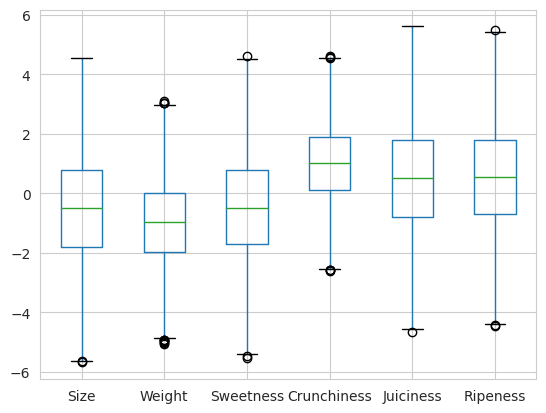

In [35]:
datos.boxplot(column=["Size","Weight","Sweetness","Crunchiness","Juiciness","Ripeness"])

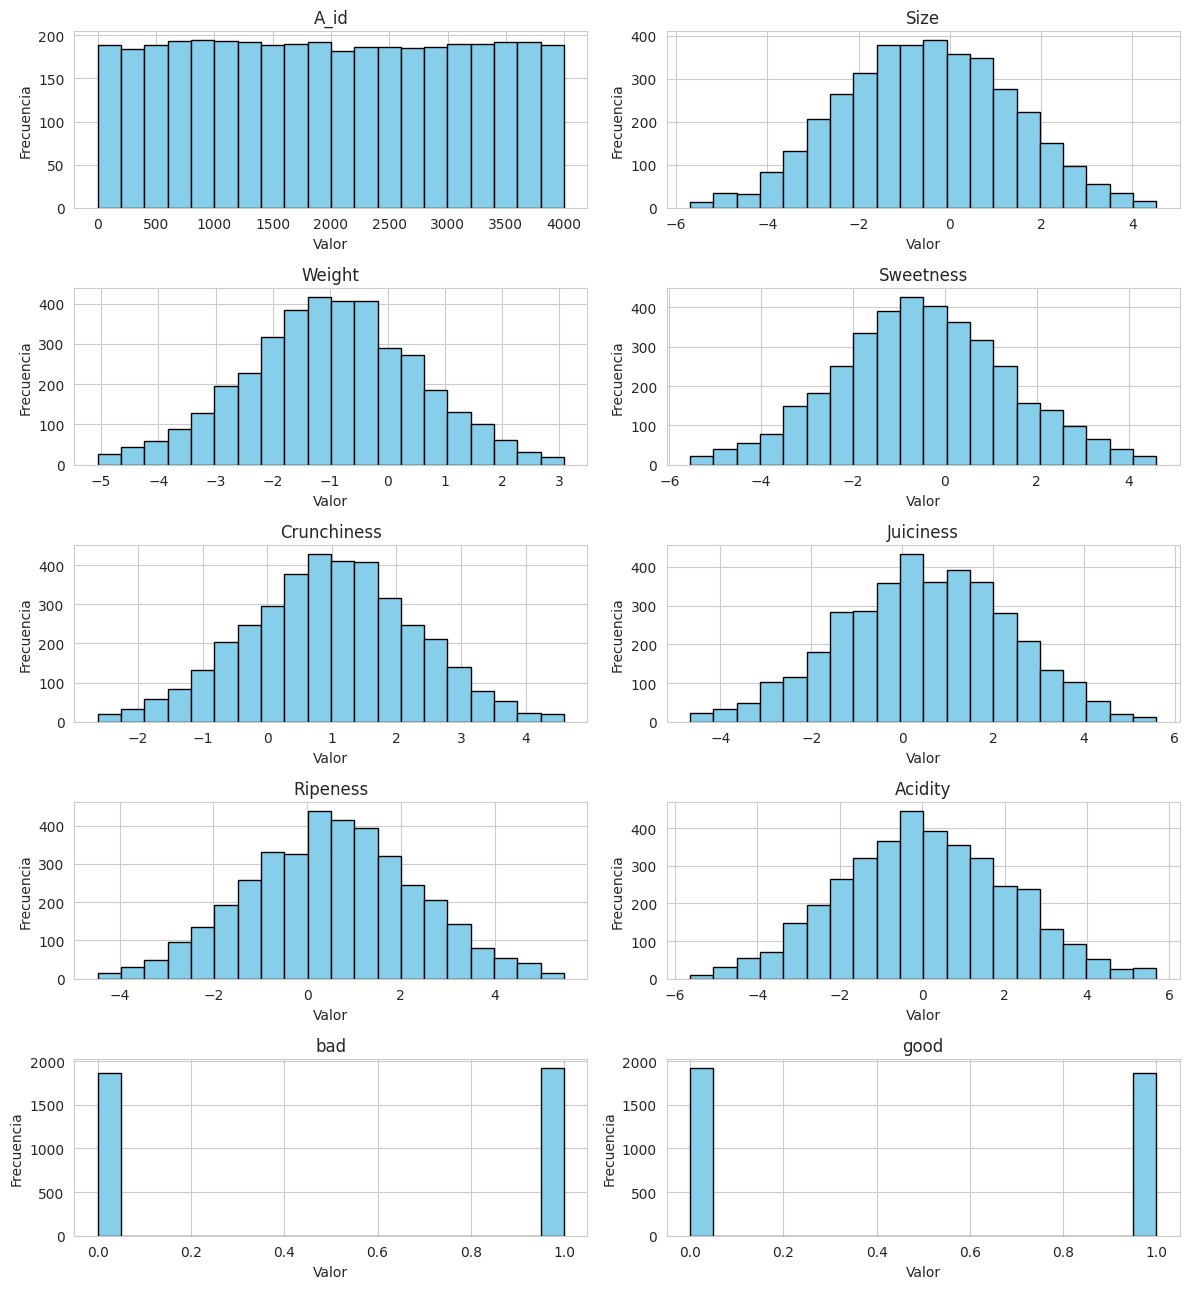

In [36]:
plt.figure(figsize=(12, 13))

for i, col in enumerate(datos.columns):

    plt.subplot(5, 2, i+1)

    plt.hist(datos[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()

plt.show()

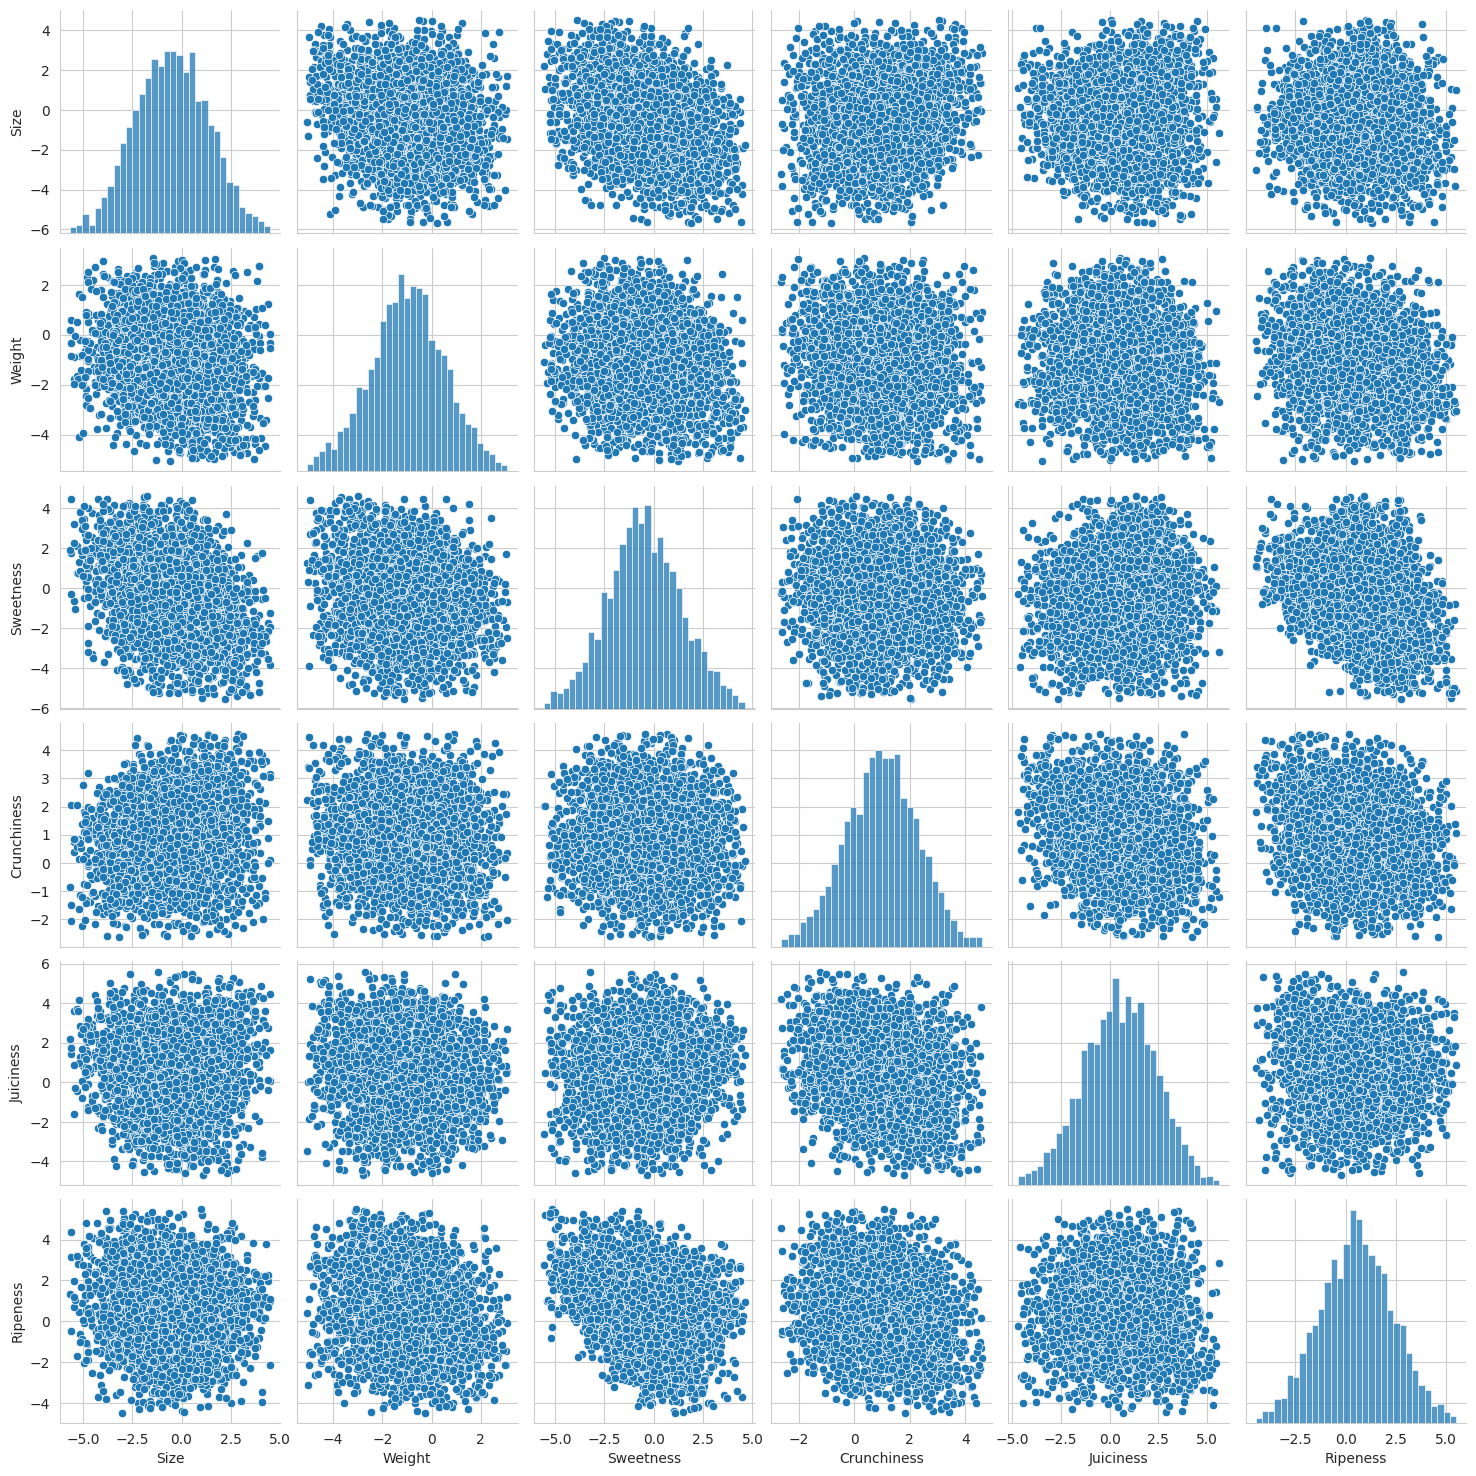

In [37]:
sns.pairplot(data=datos[["Size","Weight","Sweetness","Crunchiness","Juiciness","Ripeness"]])